In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3


In [5]:
con = sqlite3.connect(r'C:\Users\nazir\Desktop\ML Projects\Password_strength_Prediction/password_data.sqlite')

In [6]:
data = pd.read_sql_query('Select * from Users', con=con)

In [7]:
data.shape

(100000, 3)

In [8]:
data.head(3)

index      password  strength
0      0     zxe870819         1
1      1  xw46454nr23l         1
2      2     soporte13         1

In [9]:
data.drop(columns='index', inplace=True)

In [10]:
data.duplicated().sum()

0

In [11]:
data.isna().any()

password    False
strength    False
dtype: bool

In [12]:
data.isna().sum()

password    0
strength    0
dtype: int64

In [13]:
data.dtypes

password    object
strength     int64
dtype: object

In [14]:
data.strength.unique()

array([1, 2, 0], dtype=int64)

In [15]:
 data[data.password.str.isnumeric()] # numeric passwords

password  strength
12280   943801         0
14992    12345         0
20958   147856         0
21671   140290         0
23269   123987         0
28569  1233214         0
31329  0159456         0
32574   363761         0
37855  4524344         0
43648  5521597         0
45271   626262         0
52266   156651         0
58717      369         0
59619   151106         0
67723     1234         0
68106  1995151         0
68592   112233         0
69255  9562489         0
74938       12         0
77298    18731         0
86406     1050         0
86608   158491         0
94908   060415         0
96459        1         0
98122  6975818         0
98248   454545         0

In [16]:
 data[data.password.str.isalpha()] # Only alphabet

password  strength
267    PomarancaÇ         1
1380       smgodt         0
3198        cuado         0
4560        jelsz         0
6380       demsxp         0
7803       secret         0
9218      caballo         0
11555         mhe         0
11667      kreedo         0
13645     nõmlich         0
14665     tahiana         0
14890      bolaos         0
16741      sherry         0
18066      llÚÚßß         0
19500       maraa         0
25572       akido         0
26472       abcde         0
28238       HAMED         0
29116      cacinG         0
31029      indißn         0
32283      niatkm         0
36935     sarokkd         0
46289     zxcvbnm         0
48091      taison         0
48204     jasacom         0
48943      elseor         0
49608      elango         0
51434     lestari         0
52874     anhyeem         0
56272      briceo         0
61580       askim         0
61993      dßniel         0
63031      kimota         0
67165      trcske         0
67593      BRTTAM         0
69501       cuada         0
73125     hepkret         0
74049       anann         0
74553     kobraak         0
75073     glemlak         0
75294     jgkocka         0
76977     Dungeon         0
78199     nikuÜka         0
80307      castao         0
82638     winseen         0
84115       sayap         0
85423       adgjl         0
89287     nyomork         0
92715     regipek         0
92992       grkan         0

In [17]:
 data[data.password.str.isalnum()]

password  strength
0         zxe870819         1
1      xw46454nr23l         1
2         soporte13         1
4          c443balg         1
5         16623670p         1
...             ...       ...
99995    obejofi215         1
99996    fmiopvxb64         1
99997     czvrbun38         1
99998     mymyxe430         1
99999   glqjhkxb467         1

[97203 rows x 2 columns]

In [18]:
# Checking for special characters
import string

In [19]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
def find_semantics(x):
    for char in x:
        if char in string.punctuation:
            return(1)
        else:
            pass

In [21]:
data.password.apply(find_semantics) ==1 # A filter indicating whether a password contains a special character or not

0        False
1        False
2        False
3         True
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: password, Length: 100000, dtype: bool

In [22]:
data[data.password.apply(find_semantics) ==1]

password  strength
3      accounts6000webhost.com         2
68                12463773800+         1
98                  p.r.c.d.g.         1
145                  cita-cita         1
180         karolina.susnina0U         2
...                        ...       ...
99748             maiselis.com         1
99845          hosting4meze!@#         2
99954         semista_bakung15         2
99980         halflife2010!LEB         2
99988                lbhtrnjh@         1

[2663 rows x 2 columns]

In [23]:
data.password.str.len()

0         9
1        12
2         9
3        23
4         8
         ..
99995    10
99996    10
99997     9
99998     9
99999    11
Name: password, Length: 100000, dtype: int64

In [24]:
data['length'] = data.password.str.len()
data.head(3)

password  strength  length
0     zxe870819         1       9
1  xw46454nr23l         1      12
2     soporte13         1       9

In [25]:
# Determining the counts of lower letter
def freq_lowercase(x):
    return(round(len([char for char in x if char.islower()])/len(x), 3))



In [26]:
# Determining the counts of lower letter
def freq_uppercase(x):
    return(round(len([char for char in x if char.isupper()])/len(x), 3))



In [27]:
# Determining the counts of digits letter
def freq_numerical_case(x):
    return(round(len([char for char in x if char.isdigit()])/len(x), 3))


In [28]:
data['lowercase_freq'] = data.password.apply(freq_lowercase)
data['uppercase_freq'] = data.password.apply(freq_uppercase)
data['digit_freq'] = data.password.apply(freq_numerical_case)

In [29]:
data.head(60)

password  strength  length  lowercase_freq  uppercase_freq  \
0                 zxe870819         1       9           0.333           0.000   
1              xw46454nr23l         1      12           0.417           0.000   
2                 soporte13         1       9           0.778           0.000   
3   accounts6000webhost.com         2      23           0.783           0.000   
4                  c443balg         1       8           0.625           0.000   
5                 16623670p         1       9           0.111           0.000   
6                  yj9q3f8p         1       8           0.625           0.000   
7           180ZIRUVIcuFERy         2      15           0.200           0.600   
8                  djredd09         1       8           0.750           0.000   
9                 yin172015         1       9           0.333           0.000   
10               bodrum1903         1      10           0.600           0.000   
11                 sapito22         1       8           0.750           0.000   
12               35av2975z5         1      10           0.300           0.000   
13                 muka2005         1       8           0.500           0.000   
14           crnogorac381PG         2      14           0.643           0.143   
15             qq1318242449         1      12           0.167           0.000   
16               ubancyr895         1      10           0.700           0.000   
17                heihei321         1       9           0.667           0.000   
18                konjina88         1       9           0.778           0.000   
19                mihibo379         1       9           0.667           0.000   
20                  dtc5aoy         0       7           0.857           0.000   
21                 oejcr710         1       8           0.625           0.000   
22             jukutpaku321         1      12           0.750           0.000   
23                voqozu697         1       9           0.667           0.000   
24               dpkashyap3         1      10           0.900           0.000   
25                 bedys583         1       8           0.625           0.000   
26         0Y1QKoDUzOAb83Zs         2      16           0.250           0.500   
27               dhmusic007         1      10           0.700           0.000   
28             4911501833ff         1      12           0.167           0.000   
29           greatPERSON123         2      14           0.357           0.429   
30          354OfaWaPemymIr         2      15           0.533           0.267   
31              3118163841n         1      11           0.091           0.000   
32         Rtg9JEjY2MARgl1h         2      16           0.375           0.438   
33               love4music         1      10           0.900           0.000   
34                 gadyt897         1       8           0.625           0.000   
35                 a226joyi         1       8           0.625           0.000   
36               iqecyka288         1      10           0.700           0.000   
37               oraloral93         1      10           0.800           0.000   
38              vav14639832         1      11           0.273           0.000   
39         YzXtV6TUxMwoQKml         2      16           0.438           0.500   
40          AVYziJyQevot714         2      15           0.467           0.333   
41                 volvo850         1       8           0.625           0.000   
42                9lvquzz55         1       9           0.667           0.000   
43                mysekf123         1       9           0.667           0.000   
44               killadude1         1      10           0.900           0.000   
45                morior666         1       9           0.667           0.000   
46                 wvhwvo15         1       8           0.750           0.000   
47                  paxton0         0       7           0.857           0.000   
48               rfvfrfvf88         1      10     

In [30]:
def freq_special_case(x):
    return(round(len([char for char in x if not char.isalnum()])/len(x), 3))

In [32]:
# special_char('accounts6000webhost.com')

In [33]:
data['special_char_freq'] = data.password.apply(freq_special_case)

In [34]:
data.head()

password  strength  length  lowercase_freq  uppercase_freq  \
0                zxe870819         1       9           0.333             0.0   
1             xw46454nr23l         1      12           0.417             0.0   
2                soporte13         1       9           0.778             0.0   
3  accounts6000webhost.com         2      23           0.783             0.0   
4                 c443balg         1       8           0.625             0.0   

   digit_freq  special_char_freq  
0       0.667              0.000  
1       0.583              0.000  
2       0.222              0.000  
3       0.174              0.043  
4       0.375              0.000

In [35]:
data.describe().T

count      mean       std  min    25%    50%     75%  \
strength           100000.0  0.988730  0.510926  0.0  1.000  1.000   1.000   
length             100000.0  9.986700  2.887813  1.0  8.000  9.000  11.000   
lowercase_freq     100000.0  0.615026  0.220644  0.0  0.500  0.667   0.778   
uppercase_freq     100000.0  0.053537  0.153889  0.0  0.000  0.000   0.000   
digit_freq         100000.0  0.327797  0.198814  0.0  0.188  0.300   0.400   
special_char_freq  100000.0  0.003636  0.027050  0.0  0.000  0.000   0.000   

                     max  
strength             2.0  
length             220.0  
lowercase_freq       1.0  
uppercase_freq       1.0  
digit_freq           1.0  
special_char_freq    1.0

In [36]:
data.groupby('strength').agg(['min', 'max', 'mean'])

C:\Users\nazir\AppData\Local\Temp\ipykernel_28480\2645778120.py:1: FutureWarning: ['password'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  data.groupby('strength').agg(['min', 'max', 'mean'])


length                 lowercase_freq                   \
            min  max       mean            min    max      mean   
strength                                                          
0             1    7   6.550947            0.0  1.000  0.708050   
1             8   13   9.611074            0.0  0.923  0.630067   
2            14  220  15.953421            0.0  0.917  0.424679   

         uppercase_freq                  digit_freq                   \
                    min    max      mean        min    max      mean   
strength                                                               
0                   0.0  1.000  0.012872        0.0  1.000  0.275383   
1                   0.0  0.923  0.007915        0.0  0.923  0.360123   
2                   0.0  0.889  0.367633        0.0  0.895  0.193796   

         special_char_freq                   
                       min    max      mean  
strength                                     
0                      0.0  1.000  0.003696  
1                      0.0  0.818  0.001895  
2                      0.0  0.741  0.013867

In [37]:
data.columns.to_list()[2:]

['length',
 'lowercase_freq',
 'uppercase_freq',
 'digit_freq',
 'special_char_freq']

In [38]:
for col in data.columns.to_list()[2:]:
    print(data[[col, 'strength']].groupby(['strength']).aggregate(['min', 'max', 'mean', 'median']))
    print('\n')

         length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0


         lowercase_freq                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.708050  0.714
1                   0.0  0.923  0.630067  0.667
2                   0.0  0.917  0.424679  0.400


         uppercase_freq                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.012872  0.000
1                   0.0  0.923  0.007915  0.000
2                   0.0  0.889  0.367633  0.429


         digit_freq                        
                min    max      mean median
strength                                   
0               0.0  1.000  0.275383  0.286
1       

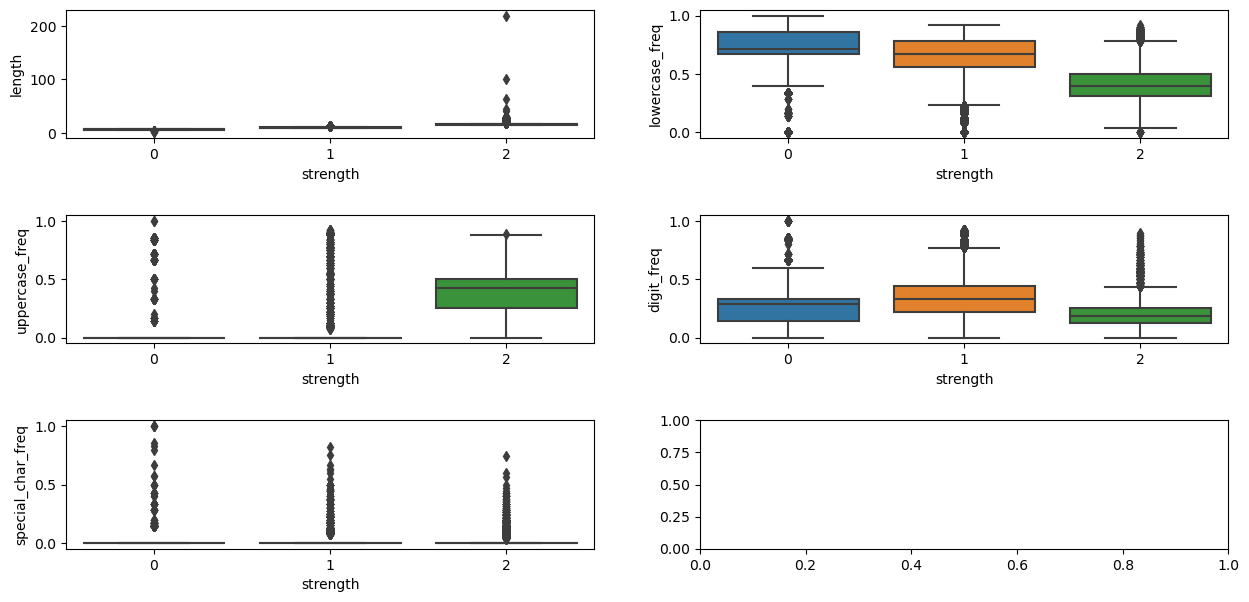

In [39]:
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, figsize = (15, 7))
sns.boxplot(data = data, x = 'strength', y = 'length', ax= ax1)
sns.boxplot(data = data, x = 'strength', y = 'lowercase_freq', ax= ax2)
sns.boxplot(data = data, x = 'strength', y = 'uppercase_freq', ax= ax3)
sns.boxplot(data = data, x = 'strength', y = 'digit_freq', ax= ax4)
sns.boxplot(data = data, x = 'strength', y = 'special_char_freq', ax= ax5)
plt.subplots_adjust(hspace= 0.6)

In [40]:
def get_dist(data, feature):
    
    plt.subplot(1,2,1)
    sns.violinplot(data= data, x = 'strength', y = feature)
    
    plt.subplot(1,2,2)
    
    sns.distplot(data[data['strength'] == 0][feature], color='red', label='0', hist = False)
    sns.distplot(data[data['strength'] == 1][feature], color='blue', label='1', hist = False)
    sns.distplot(data[data['strength'] == 2][feature], color='orange', label='2', hist = False)
    plt.legend()
    plt.show()

In [41]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

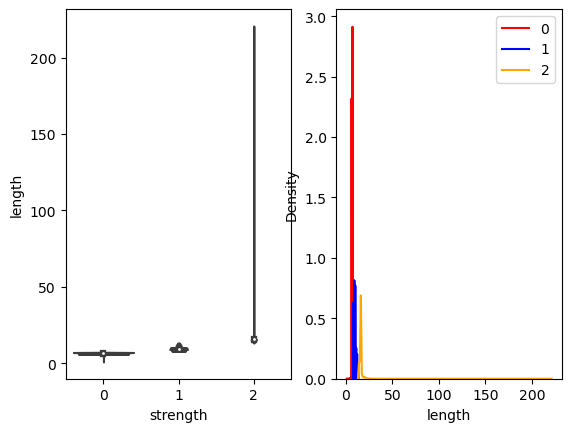

In [42]:
get_dist(data, 'length')

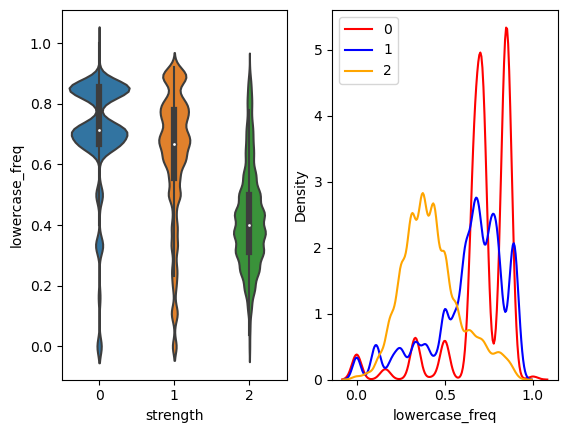

In [43]:
get_dist(data, 'lowercase_freq')

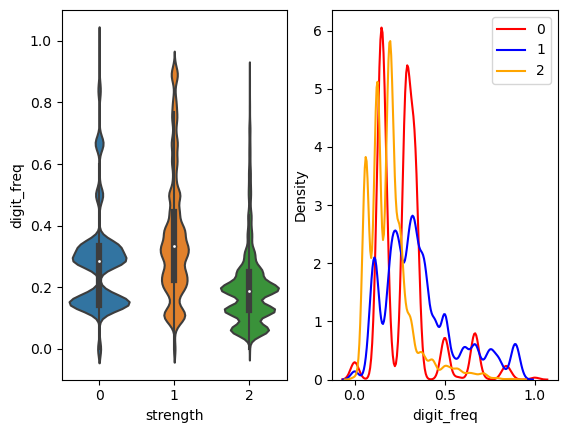

In [44]:
get_dist(data, 'digit_freq')

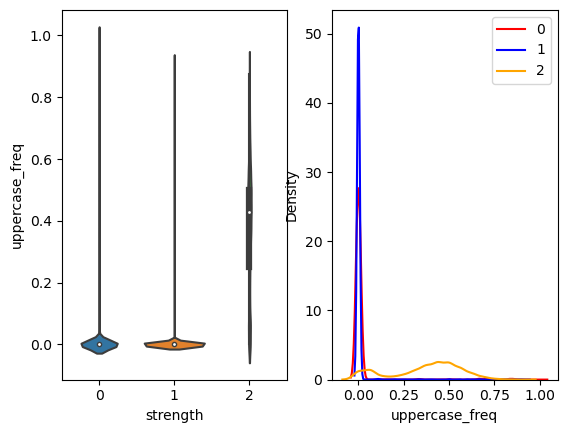

In [45]:
get_dist(data, 'uppercase_freq')

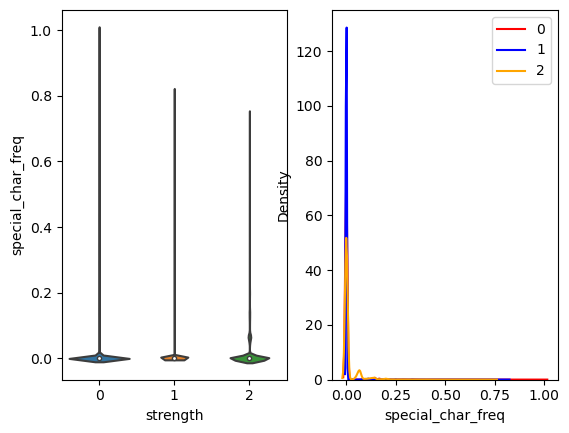

In [46]:
get_dist(data, 'special_char_freq')

# Features that has some amount of separation in their distribution plot with respect to the target variable are the important features. In this case, length and lower_case letter

## TF-IDF

In [47]:
dataframe = data.sample(frac=1)
dataframe.shape

(100000, 7)

In [48]:
x = list(dataframe['password']) # Tfidf takes an array or list as argument

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [50]:
vectorizer = TfidfVectorizer(analyzer='char') # initializing the Tfidf

In [51]:
X = vectorizer.fit_transform(x) # fitting and transforming with Tfidf on the list

In [52]:
X.shape

(100000, 99)

In [53]:
X # Return matrix is a sparse matrix. Matrix with bunch of zeros

<100000x99 sparse matrix of type '<class 'numpy.float64'>'
	with 842571 stored elements in Compressed Sparse Row format>

In [54]:
X = X.toarray() # Converting the sparse matrix into array
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [55]:
vectorizer.get_feature_names_out() # Retrieving feature names from the vectorizer

array(['\x04', '\x06', '\x08', '\x0e', '\x10', '\x11', '\x17', ' ', '!',
       '#', '$', '%', '&', '(', ')', '*', '+', '-', '.', '/', '0', '1',
       '2', '3', '4', '5', '6', '7', '8', '9', ';', '<', '=', '>', '?',
       '@', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f',
       'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's',
       't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '¡', '¨',
       '°', '±', '³', '´', 'µ', '·', 'ß', 'à', 'á', 'ä', 'æ', 'ç', 'é',
       'ê', 'í', 'ñ', 'ó', 'õ', 'ö', '÷', 'ú', 'ü', 'ý', 'þ', '›'],
      dtype=object)

In [56]:
df2 = pd.DataFrame(X, columns= vectorizer.get_feature_names_out()) # Creating a df with the array and the feature names
df2.head()

                                 !    #  ...    ñ    ó    õ    ö  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

     ÷    ú    ü    ý    þ    ›  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 99 columns]

In [57]:
# Adding the two important features to our dataframe

df2['length'] = data.length
df2['lowercase_freq'] = data.lowercase_freq
df2.head()

                                 !    #  ...    õ    ö    ÷    ú  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

     ü    ý    þ    ›  length  lowercase_freq  
0  0.0  0.0  0.0  0.0       9           0.333  
1  0.0  0.0  0.0  0.0      12           0.417  
2  0.0  0.0  0.0  0.0       9           0.778  
3  0.0  0.0  0.0  0.0      23           0.783  
4  0.0  0.0  0.0  0.0       8           0.625  

[5 rows x 101 columns]

In [58]:
df2

                                 !    #  ...    õ    ö    ÷  \
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
99995  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
99996  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
99997  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
99998  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
99999  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

         ú    ü    ý    þ    ›  length  lowercase_freq  
0      0.0  0.0  0.0  0.0  0.0       9           0.333  
1      0.0  0.0  0.0  0.0  0.0      12           0.417  
2      0.0  0.0  0.0  0.0  0.0       9           0.778  
3      0.0  0.0  0.0  0.0  0.0      23           0.783  
4      0.0  0.0  0.0  0.0  0.0       8           0.625  
...    ...  ...  ...  ...  ...     ...             ...  
99995  0.0  0.0  0.0  0.0  0.0      10           0.700  
99996  0.0  0.0  0.0  0.0  0.0      10           0.800  
99997  0.0  0.0  0.0  0.0  0.0       9           0.778  
99998  0.0  0.0  0.0  0.0  0.0       9           0.667  
99999  0.0  0.0  0.0  0.0  0.0      11           0.727  

[100000 rows x 101 columns]

# model fitting

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier

In [60]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [61]:
X_train, X_test, y_train, y_test = train_test_split(df2, data.strength, test_size=0.2, random_state=42)

In [62]:
X_train.shape

(80000, 101)

In [63]:
y_train.shape

(80000,)

In [64]:
lr_model = LogisticRegression(multi_class='multinomial')
rf_model = RandomForestClassifier()
adb_model = AdaBoostClassifier()
bc_model = BaggingClassifier()

In [65]:
lr_model.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

In [66]:
y_pred = lr_model.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 2, 1], dtype=int64)

In [67]:
accuracy_score(y_test, y_pred)

1.0

In [68]:
confusion_matrix(y_test, y_pred)

array([[ 2700,     0,     0],
       [    0, 14852,     0],
       [    0,     0,  2448]], dtype=int64)

In [71]:
def scores(model):
    model_name = str(model)[:-2]
    ml_model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('\n')
    print('Accuracy score for ' + model_name + ' is:  {}'.format(accuracy_score(y_test, y_pred)))
    print('\n')
    print('Confusion matrix for ' + model_name + ' is:  {}'.format(confusion_matrix(y_test, y_pred)))
    print('\n')
    print('Classification report for ' + model_name + ' is:  {}'.format(classification_report(y_test, y_pred)))

In [72]:
scores(RandomForestClassifier())



Accuracy score for RandomForestClassifier is:  1.0


Confusion matrix for RandomForestClassifier is:  [[ 2700     0     0]
 [    0 14852     0]
 [    0     0  2448]]


Classification report for RandomForestClassifier is:                precision    recall  f1-score   support

           0       1.00      1.00      1.00      2700
           1       1.00      1.00      1.00     14852
           2       1.00      1.00      1.00      2448

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



# Making a prediction from new password

In [236]:
password = 'AHGFTh32@ehgf'
s_array = np.array([password])
s_array

array(['AHGFTh32@ehgf'], dtype='<U13')

In [237]:
feat = vectorizer.transform(s_array) # Vectorizer takes data as array or list

In [247]:
feat = feat.toarray()

In [239]:
length = len(password)
length

13

In [249]:
lower_freq = round(len([char for char in password if char.islower()])/len(password), 3)
lower_freq

0.385

In [257]:
new = np.append(feat, ([length, lower_freq])).reshape(1,101)

In [256]:
new.shape

(101,)

In [260]:
new.shape

(1, 101)

In [263]:
a = lr_model.predict(new)
a == 1

array([ True])

In [73]:
def prediction():
    password = input("Please enter your password: ")
    sample_array = np.array([password])
    
    sample_matrix = vectorizer.transform(sample_array)
    
    length_pass = len(password)
    lower_freq = len([char for char in password if char.islower()])/len(password)
    new_matrix = np.append(sample_matrix.toarray(), (length_pass, lower_freq)).reshape(1, 101)
    res = lr_model.predict(new_matrix)
    
    if res == 0:
        return 'Your password is weak'
    elif res == 1:
        return'Your password is normal'
    else:
        return'Your password is strong'
    

In [74]:
prediction()

Please enter your password: sdsHGFR345@$$


'Your password is normal'

In [75]:
prediction()

Please enter your password: asd12


'Your password is weak'

In [77]:
prediction()

Please enter your password: Zubekeena1


'Your password is normal'